<a href="https://colab.research.google.com/github/vitaoTM/Alura-BootCamp-DataScience/blob/main/An%C3%A1lise_do_numero_de_obitos_por_regi%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos números de óbitos por região no Brasil

Neste notebook, será feito uma análise do numero de óbitos no brasil desde 2008, com o intuito de entender variações sazonais na mudança populacional.

In [5]:
import pandas as pd
import matplotlib.colors as mplc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Dados Utilizados 
* tabnet DATASUS
- A tabela csv esta no meu drive, nao lembro se dixei acesso livre para todos, mas baixei aqui 

* https://datasus.saude.gov.br/informacoes-de-saude-tabnet/


* Me ultilizei de algumas aulas de python da alura (seleções e frequências)

* Também dei uma olhada nos portifolios daqueles que participaram do bootcamp e usei algumas ideias: https://github.com/rodrigodemend/Analise_Sazonalidade_de_Internacoes

In [6]:
from google.colab import drive                                                  # montando google drive para poder baixar os dados  
drive.mount('/content/drive')                                                   #diretamente


Mounted at /content/drive


In [7]:
### Importando dados e criando um DataFrame com eles
sel_encode= "ISO-8859-1"
url = "/content/drive/MyDrive/ALURA DATA SCIENCE/Modulo_1/Desafio1/A005158189_28_143_208.csv"
pd.options.display.float_format='{:.2f}'.format
dados = pd.read_csv(url, sep=";", encoding = sel_encode,
                    skipfooter=12, skiprows=3, thousands='.', decimal=',' )
dados = dados.replace('-', np.nan)
dados.head()                                                                    # Visualizando as 5 primeiras linhas do DataFrame                

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,Total
0,11 Rondônia,57,99,45,43,54,47,109,114,105,...,812,736,652,541,407,359,340,294,288,41062
1,12 Acre,30,94,76,103,94,71,114,116,104,...,205,335,309,121,223,182,169,156,140,20250
2,13 Amazonas,149,243,312,320,240,270,288,284,254,...,1898,1218,897,881,860,686,612,548,501,71297
3,14 Roraima,23,21,23,38,26,24,38,29,34,...,299,210,168,180,188,190,156,143,103,13816
4,15 Pará,543,581,655,524,622,629,742,658,767,...,1557,2179,2502,1603,1307,1286,1247,1127,955,152188


# Limpando Dados obtidos

In [8]:
dados_obitos = dados.set_index('Unidade da Federação')                          # Limpando dados, setando novo index como coluna da Unidade da Federação
dados_obitos.head(2)                                                             # Visualizando novos dados

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,2021/Out,2021/Nov,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,57,99,45,43,54,47,109,114,105,124,...,812,736,652,541,407,359,340,294,288,41062
12 Acre,30,94,76,103,94,71,114,116,104,77,...,205,335,309,121,223,182,169,156,140,20250


In [9]:
colunas_mes_ano =  dados.mean().index
colunas_mes_ano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Index(['2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun',
       '2008/Jul', '2008/Ago', '2008/Set', '2008/Out',
       ...
       '2021/Mar', '2021/Abr', '2021/Mai', '2021/Jun', '2021/Jul', '2021/Ago',
       '2021/Set', '2021/Out', '2021/Nov', 'Total'],
      dtype='object', length=167)

In [10]:
# Transpondo e criando um novo DataFrame a partir do primeiro
dados_transposto = pd.DataFrame(dados_obitos.T)
dados_transposto

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Jan,57,30,149,23,543,65,141,202,224,548,...,232,1132,4762,1342,800,1415,215,206,563,345
2008/Fev,99,94,243,21,581,81,210,320,337,1021,...,324,1423,6849,2099,1115,2737,348,381,757,403
2008/Mar,45,76,312,23,655,42,253,308,337,1142,...,426,2481,7525,1948,1090,2565,306,338,595,405
2008/Abr,43,103,320,38,524,51,199,335,277,1231,...,489,2218,7818,1894,1080,2562,301,425,710,482
2008/Mai,54,94,240,26,622,34,173,374,368,1144,...,374,2792,9152,1994,1032,2232,394,335,627,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/Ago,359,182,686,190,1286,133,333,1301,872,2193,...,287,6111,15023,4837,2730,4523,1184,1170,2150,759
2021/Set,340,169,612,156,1247,132,407,1123,699,2153,...,249,6087,12613,4251,2240,3916,1052,821,1873,811
2021/Out,294,156,548,143,1127,90,355,1013,663,1687,...,258,5047,11238,3834,2219,3715,675,737,1492,767
2021/Nov,288,140,501,103,955,82,335,989,549,1676,...,229,4734,10904,3565,2149,3639,772,549,762,643


In [11]:
regiao_1 = dados_obitos.index[:7]                                                          # Separando estado por regiao
regiao_2 = dados_obitos.index[7:16]
regiao_3 = dados_obitos.index[16:20]
regiao_4 = dados_obitos.index[20:23]
regiao_5 = dados_obitos.index[23:]

* Procurei referencia no StackOverflow de como mudar o tipo NaN para int64
* https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int

In [12]:
# Visualizando se existe valores NaN no DataFrame
dados_transposto.isnull().sum()

Unidade da Federação
11 Rondônia               0
12 Acre                   1
13 Amazonas               0
14 Roraima                0
15 Pará                   0
16 Amapá                  0
17 Tocantins              0
21 Maranhão               0
22 Piauí                  0
23 Ceará                  0
24 Rio Grande do Norte    0
25 Paraíba                0
26 Pernambuco             0
27 Alagoas                0
28 Sergipe                0
29 Bahia                  0
31 Minas Gerais           0
32 Espírito Santo         0
33 Rio de Janeiro         0
35 São Paulo              0
41 Paraná                 0
42 Santa Catarina         0
43 Rio Grande do Sul      0
50 Mato Grosso do Sul     0
51 Mato Grosso            0
52 Goiás                  0
53 Distrito Federal       0
dtype: int64

* Percebe-se que existem valores NaN na coluna do Acre

In [13]:
# Tirando valores NaN e subistituindo pela media da coluna 
dados_transposto['12 Acre'].fillna(int(dados_transposto['12 Acre'].mean()), 
                                   inplace= True)
dados_transposto.isnull().sum()

Unidade da Federação
11 Rondônia               0
12 Acre                   0
13 Amazonas               0
14 Roraima                0
15 Pará                   0
16 Amapá                  0
17 Tocantins              0
21 Maranhão               0
22 Piauí                  0
23 Ceará                  0
24 Rio Grande do Norte    0
25 Paraíba                0
26 Pernambuco             0
27 Alagoas                0
28 Sergipe                0
29 Bahia                  0
31 Minas Gerais           0
32 Espírito Santo         0
33 Rio de Janeiro         0
35 São Paulo              0
41 Paraná                 0
42 Santa Catarina         0
43 Rio Grande do Sul      0
50 Mato Grosso do Sul     0
51 Mato Grosso            0
52 Goiás                  0
53 Distrito Federal       0
dtype: int64

* **Nao existem mais valores NaN** 

In [14]:
# Mudando tipos de valores para int
dados_transposto = dados_transposto.astype(int)
dados_transposto.dtypes

Unidade da Federação
11 Rondônia               int64
12 Acre                   int64
13 Amazonas               int64
14 Roraima                int64
15 Pará                   int64
16 Amapá                  int64
17 Tocantins              int64
21 Maranhão               int64
22 Piauí                  int64
23 Ceará                  int64
24 Rio Grande do Norte    int64
25 Paraíba                int64
26 Pernambuco             int64
27 Alagoas                int64
28 Sergipe                int64
29 Bahia                  int64
31 Minas Gerais           int64
32 Espírito Santo         int64
33 Rio de Janeiro         int64
35 São Paulo              int64
41 Paraná                 int64
42 Santa Catarina         int64
43 Rio Grande do Sul      int64
50 Mato Grosso do Sul     int64
51 Mato Grosso            int64
52 Goiás                  int64
53 Distrito Federal       int64
dtype: object

Text(0.5, 0, 'Unidade Da Federação')

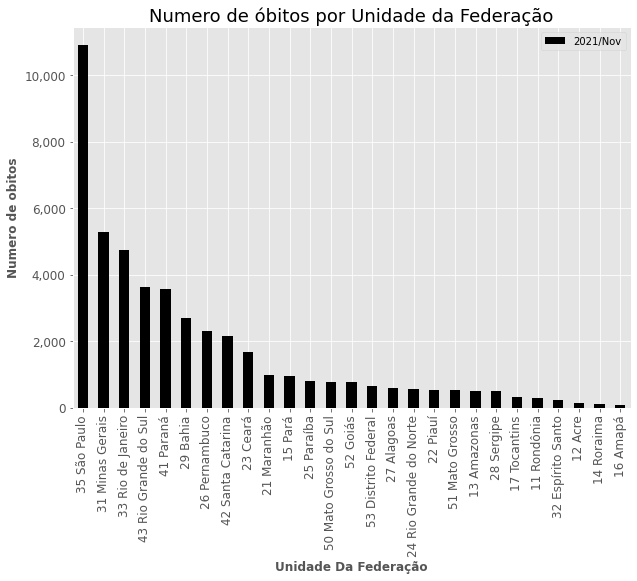

In [15]:
mes_ano = '2021/Nov'                                                            # Definindo uma variavel com uma data 
dados = dados.sort_values(ascending=False, by = mes_ano)                        # Colocando em ordem decrescente do n. de obitos
plt.style.use('ggplot')                                                         # Escolhendo o estilo de grafico
ax = dados.plot(x="Unidade da Federação", y= mes_ano, kind='bar',               # Plotando grafico e setando os paramentros 
                figsize=(10,7), fontsize=(12), color='black')
plt.title('Numero de óbitos por Unidade da Federação', fontsize=(18))                           # Colocando o Titulo do gráfico
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))             # Melhorando a visualização dos numeros no eixo y
ax.yaxis.set_label_text('Numero de obitos', weight='bold')
ax.xaxis.set_label_text('Unidade Da Federação', fontsize=(12), weight='bold')    # Colocando titulo do eixo x

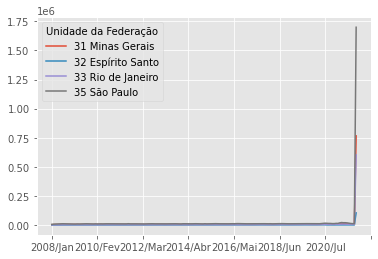

In [16]:
dados_transposto[regiao_3].plot()                                               
# Existe um erro de volor no grafico, provavelmente o n TOTAL ainda esta nos dados

In [17]:
# Retirando coluna Total de obitos 
dados_transposto = dados_transposto.drop('Total')
dados_transposto = dados_transposto.astype(int)
dados_transposto.dtypes

Unidade da Federação
11 Rondônia               int64
12 Acre                   int64
13 Amazonas               int64
14 Roraima                int64
15 Pará                   int64
16 Amapá                  int64
17 Tocantins              int64
21 Maranhão               int64
22 Piauí                  int64
23 Ceará                  int64
24 Rio Grande do Norte    int64
25 Paraíba                int64
26 Pernambuco             int64
27 Alagoas                int64
28 Sergipe                int64
29 Bahia                  int64
31 Minas Gerais           int64
32 Espírito Santo         int64
33 Rio de Janeiro         int64
35 São Paulo              int64
41 Paraná                 int64
42 Santa Catarina         int64
43 Rio Grande do Sul      int64
50 Mato Grosso do Sul     int64
51 Mato Grosso            int64
52 Goiás                  int64
53 Distrito Federal       int64
dtype: object

# Visualizando dados na forma de graficos por região
* algumas referencias utilizadas:
 * Como mudar as escalas no eixo x:
 https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
 
 * Adicionando titulos nos eixos 
 https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
 * Como separar as casas de milhar
 https://matplotlib.org/stable/api/ticker_api.html?highlight=strme#matplotlib.ticker.StrMethodFormatter
 * Como mudar o estilo de grafico apresentado
  https://matplotlib.org/stable/api/style_api.html?highlight=style%20use#matplotlib.style.use

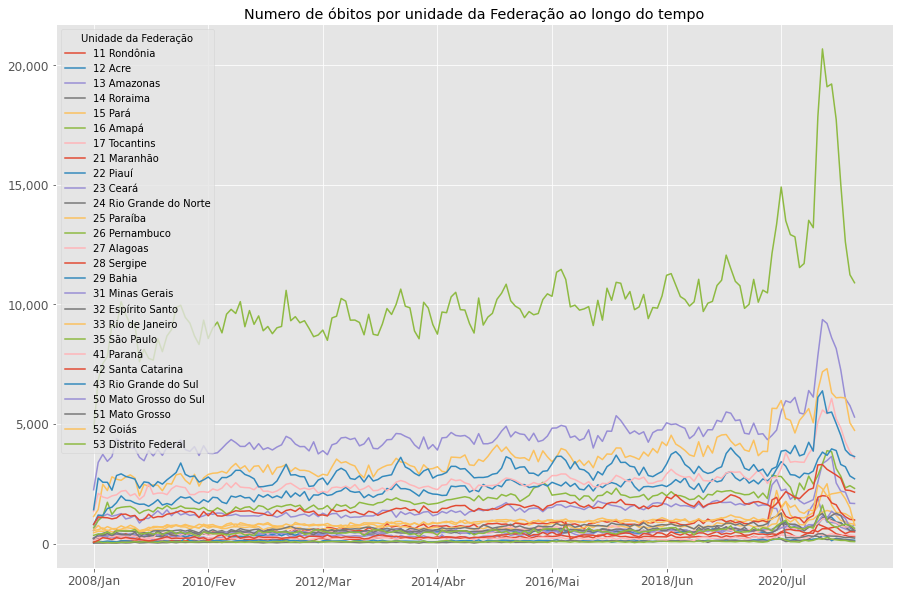

In [18]:
ax0 = dados_transposto.plot(figsize=(15,10), fontsize=(12) )
plt.title('Numero de óbitos por unidade da Federação ao longo do tempo')
ax0.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

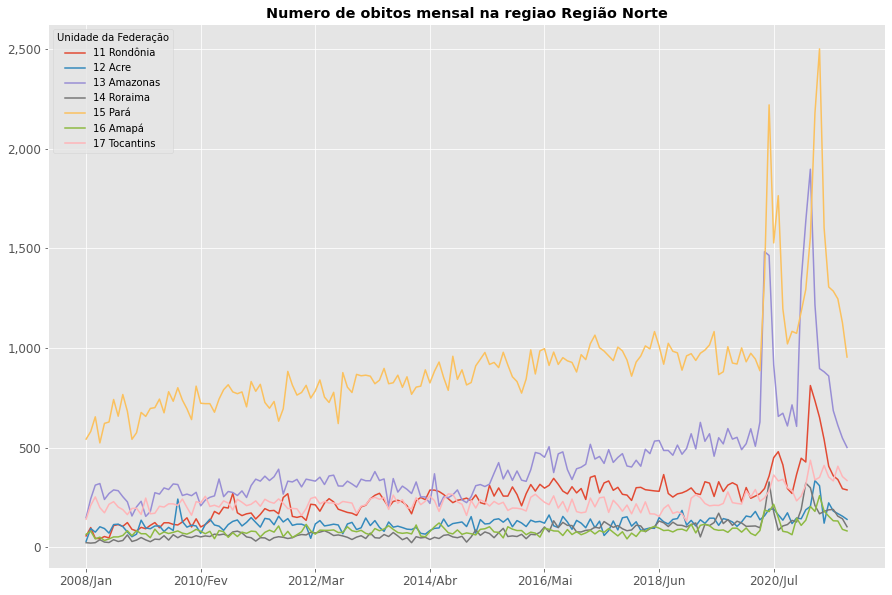

In [19]:
norte = "Região Norte"
centro = "Regiao Centro" 
sul = "Região Sul"
centroeste = "Região Centroeste"
nordeste = "Região Nordeste"
ax = dados_transposto[regiao_1].plot(figsize=(15,10), fontsize=(12) )
plt.title(label= f'Numero de obitos mensal na regiao {norte}',weight= 'bold')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

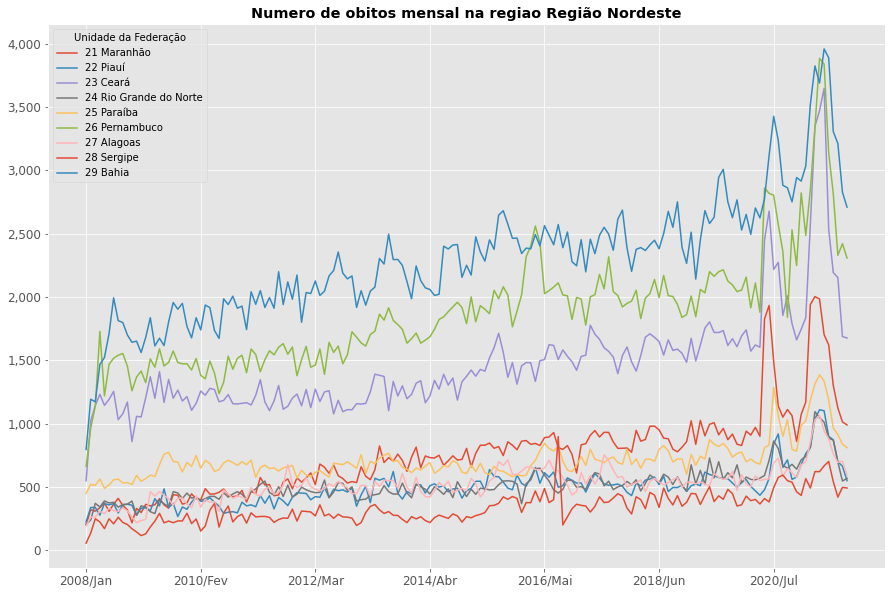

In [20]:
ax2 = dados_transposto[regiao_2].plot(figsize=(15,10), fontsize=(12))

plt.title(label= f'Numero de obitos mensal na regiao {nordeste}',weight= 'bold')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

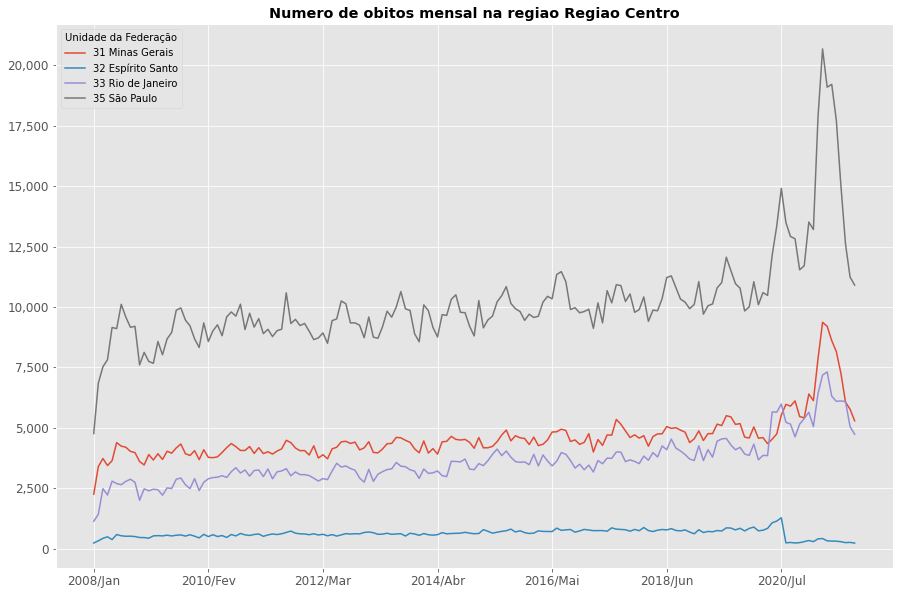

In [21]:
ax3 = dados_transposto[regiao_3].plot(figsize=(15,10), fontsize=(12))
plt.title(label= f'Numero de obitos mensal na regiao {centro}',weight= 'bold')
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

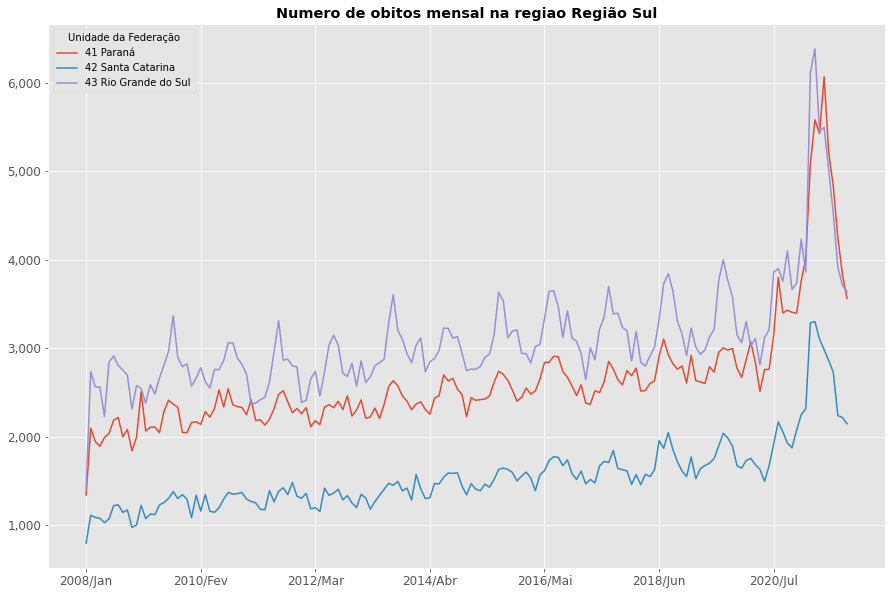

In [22]:
ax4 = dados_transposto[regiao_4].plot(figsize=(15,10), fontsize=(12))
plt.title(label= f'Numero de obitos mensal na regiao {sul}',weight= 'bold')
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

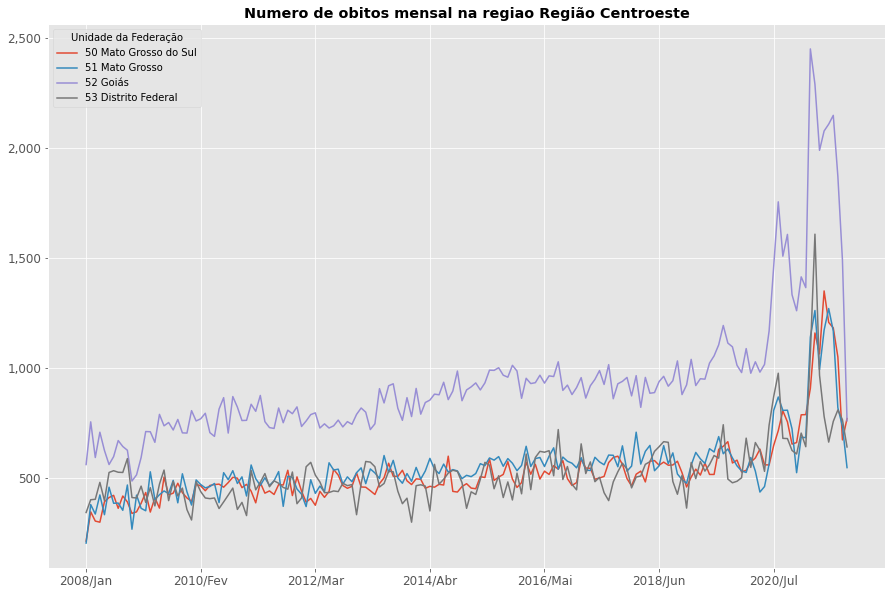

In [23]:
ax5 = dados_transposto[regiao_5].plot(figsize=(15,10), fontsize=(12))
plt.title(label= f'Numero de obitos mensal na regiao {centroeste}',weight= 'bold')
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Visualizando Estados com maior numero de mortes 


In [24]:
dados_obitos['Total'] =  dados_transposto.sum()
dados_obitos = dados_obitos.sort_values(by='Total', ascending=False)
dados_obitos = dados_obitos[:6]

In [25]:

dados_obitos = dados_obitos.drop('Total',axis=1)
dados_obitos_T = dados_obitos.T.astype(float)


In [26]:
dados_obitos_T = dados_obitos_T.astype(int)
dados_obitos_T.dtypes

Unidade da Federação
35 São Paulo            int64
31 Minas Gerais         int64
33 Rio de Janeiro       int64
43 Rio Grande do Sul    int64
41 Paraná               int64
29 Bahia                int64
dtype: object

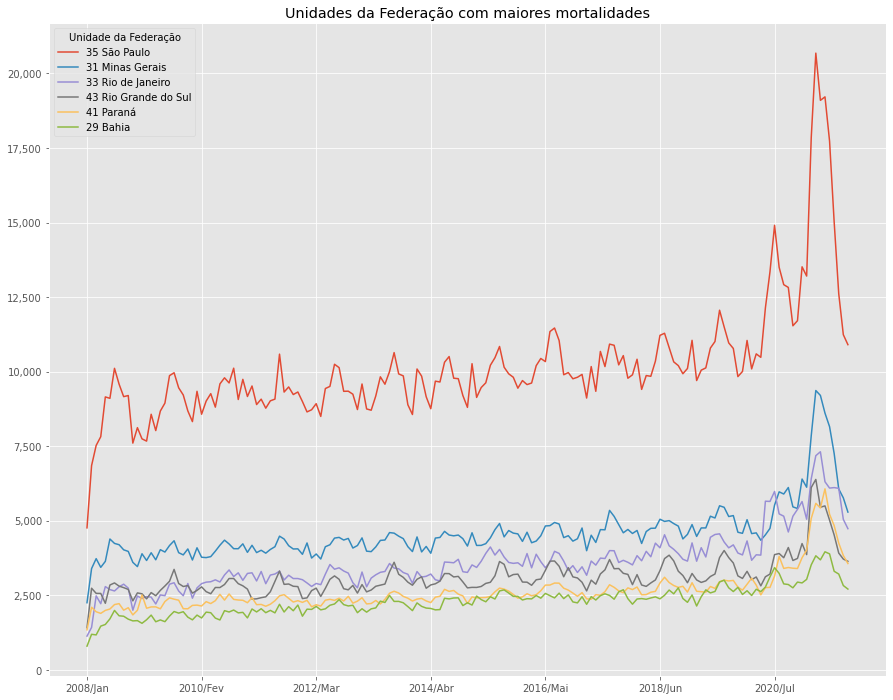

In [27]:
ax6 = dados_obitos_T.plot(figsize=(15,12))
plt.title(label="Unidades da Federação com maiores mortalidades")
ax6.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

Text(0.5, 1.0, 'Numero de mortes de Janeiro 2020 a Novembro 2021, dos 6 estados com maior incidencia')

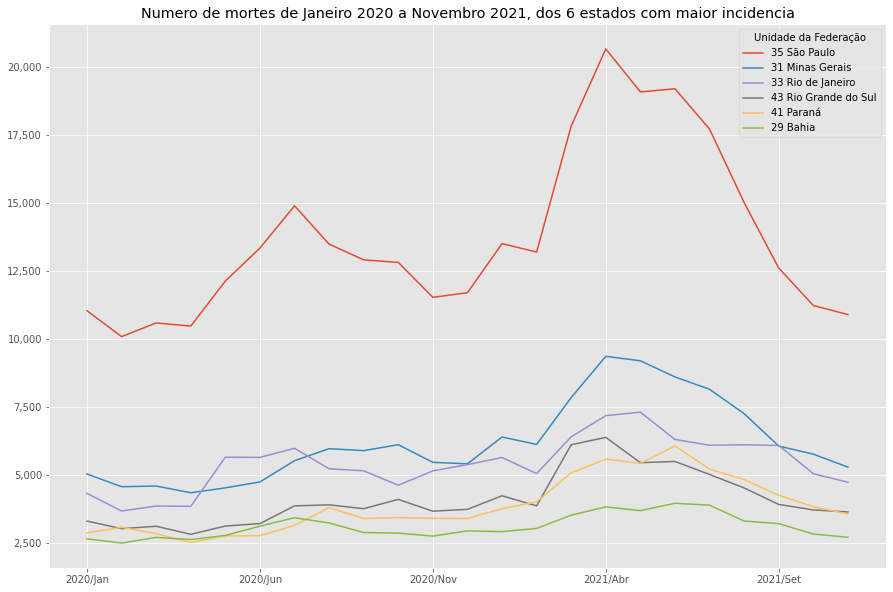

In [28]:
#dados_transposto[regiao_1]
ax7 = dados_obitos[dados_obitos.columns[-23:]].T.plot(figsize=(15,10))
ax7.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Numero de mortes de Janeiro 2020 a Novembro 2021, dos 6 estados com maior incidencia')

# Análise
 
 Observando os graficos plotados, no geral se constata que São Paulo é o estado com os maiores valores no numero de óbitos. Muito provavelmente que isso se deva a maior concentração populacional no mesmo.
 
 Verifica-se também, que o numero de obitos por mês em cada estado aumentou significativamente a partir de Agosto de 2020. Isso vai de encontro com a crise sanitária que ocorre no mundo, a covid-19.

 ** Algumas observações fora do escopo de análise:
 * primeiro projeto em data science.
 * Existem erros e espaço para melhoras...
 * Conhecimenos ainda nao adiquiridos para arrumar esses erros e melhorar a cara do projeto.

 # Modulo 2 

In [29]:
soma_dados_por_estado = dados_transposto.sum()
soma_dados_por_estado = soma_dados_por_estado.sort_values(ascending=False)
soma_dados_por_estado.index = soma_dados_por_estado.index.str[3:]
soma_dados_por_estado

Unidade da Federação
São Paulo              1699156
Minas Gerais            765764
Rio de Janeiro          602208
Rio Grande do Sul       519848
Paraná                  440892
Bahia                   384090
Pernambuco              312858
Santa Catarina          258761
Ceará                   245059
Goiás                   157206
Pará                    152188
Maranhão                125415
Paraíba                 118793
Espírito Santo          103641
Mato Grosso              92655
Mato Grosso do Sul       88309
Distrito Federal         87768
Alagoas                  87060
Rio Grande do Norte      85584
Piauí                    82884
Amazonas                 71297
Sergipe                  55826
Rondônia                 41062
Tocantins                38029
Acre                     20492
Amapá                    14219
Roraima                  13816
dtype: int64

In [31]:
dados_da_populacao = """Posição	Unidade da Federação	População (2010)[2]	População(2021)	Mudança	% da pop. total	País comparável(habitantes)

1	 São Paulo	41 262 199	46 649 132	+13.05%	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	19 597 330	21 411 923	+9.26%	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	15 989 929	17 463 349	+9.21%	8,2%	 Países Baixos (16 922 900)
4	Bahia	14 016 906	14 985 284	+6.91%	7,1%	 Chade (14 037 000)
5	 Paraná	10 444 526	11 597 484	+11.04%	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	10 693 929	11 466 630	+7.23%	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	8 796 448	9 674 793	+9.98%	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	8 452 381	9 240 580	+9.32%	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará 	7 581 051	8 777 124	+15.78%	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	6 248 436	7 338 473	+17.44%	3,4%	 Sérvia (7 114 393)
11	 Goiás	6 003 788	7 206 589	+20.03%	3,4%	 Paraguai (7 003 406)
12	 Maranhão	6 574 789	7 153 262	+8.80%	3,4%	 Paraguai (7 003 406)
13	 Amazonas	3 483 985	4 269 995	+22.56%	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	3 514 952	4 108 508	+16.89%	1,9%	 Líbano (4 168 000)
15	 Paraíba	3 766 528	4 059 905	+7.79%	1,9%	 Líbano (4 168 000)
16	 Mato Grosso	3 035 122	3 567 234	+17.53%	1,7%	 Uruguai (3 415 866)
17	 Rio Grande do Norte	3 168 027	3 560 903	+12.40%	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 120 494	3 365 351	+7.85%	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 118 360	3 289 290	+5.48%	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	2 570 160	3 094 325	+20.39%	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 449 024	2 839 188	+15.93%	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 068 017	2 338 474	+13.07%	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 562 409	1 815 278	+16.18%	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 383 445	1 607 363	+16.18%	0,7%	 Bahrein (1 359 800)
25	 Acre	733 559	906 876	+23.63%	0,4%	 Fiji (859 178)
26	 Amapá	669 526	877 613	+31.08%	0,4%	 Fiji (859 178)
27	 Roraima	450 479	652 713	+44.89%	0,3%	 Luxemburgo (562 958)"""

# referencia https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [34]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao.head()

,Posição,Unidade da Federação,População (2010)[2],População(2021),Mudança,% da pop. total,País comparável(habitantes)
0,1,São Paulo,41 262 199,46 649 132,+13.05%,"21,9%",Flag of Spain.svg Espanha (46 439 864)
1,2,Minas Gerais,19 597 330,21 411 923,+9.26%,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,15 989 929,17 463 349,+9.21%,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 016 906,14 985 284,+6.91%,"7,1%",Chade (14 037 000)
4,5,Paraná,10 444 526,11 597 484,+11.04%,"5,4%",Bolívia (11 410 651)


In [36]:
populacao['populacao'] = populacao['População(2021)'].str.replace(' ', '').astype(int)
populacao = populacao[['Unidade da Federação', 'populacao']].set_index('Unidade da Federação')
populacao.index = populacao.index.str.strip()
populacao

,populacao
Unidade da Federação,
São Paulo,46649132
Minas Gerais,21411923
Rio de Janeiro,17463349
Bahia,14985284
Paraná,11597484
Rio Grande do Sul,11466630
Pernambuco,9674793
Ceará,9240580
Pará,8777124
